In [14]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import sklearn
import scipy.io

In [2]:
img = Image.open(r"./image/beach.jpg")
img = np.array(img)

In [3]:
imshape = img.shape

In [4]:
imshape

(183, 275, 3)

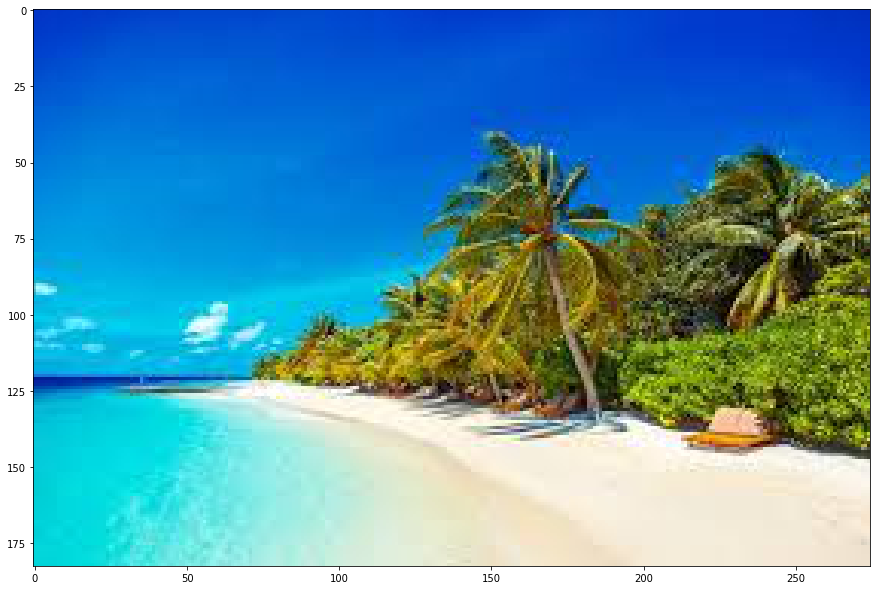

In [5]:
plt.figure(figsize=(15,15))
plt.imshow(img)

In [6]:
img = img.reshape(-1,3)

In [7]:
from sklearn.cluster import KMeans

In [8]:
km3 = KMeans(n_clusters=3).fit(img)
km4 = KMeans(n_clusters=4).fit(img)
km5 = KMeans(n_clusters=5).fit(img)
#cluskm = km.labels_

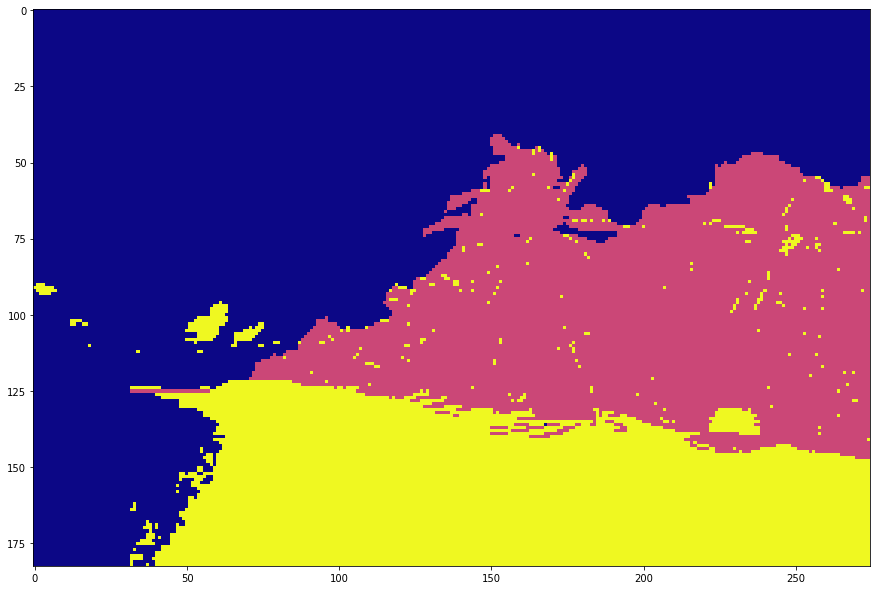

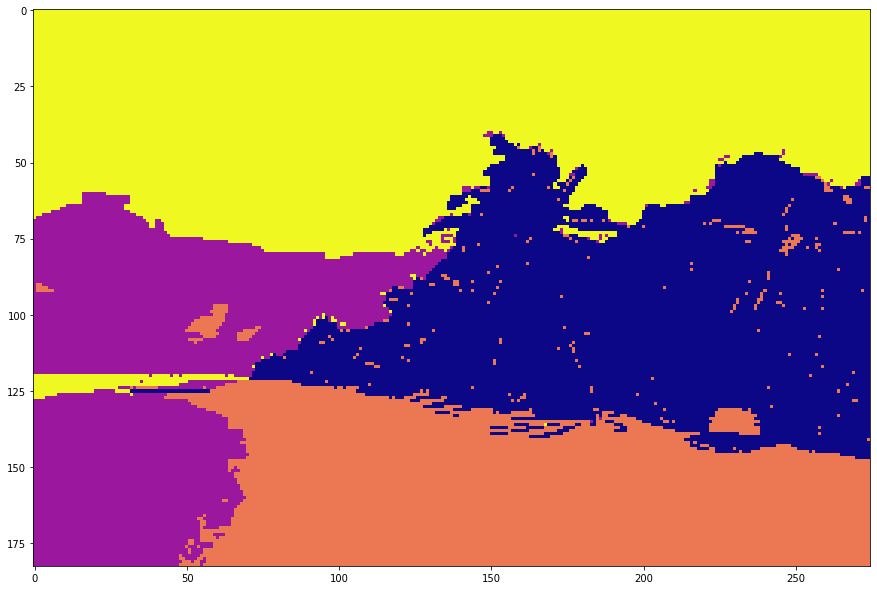

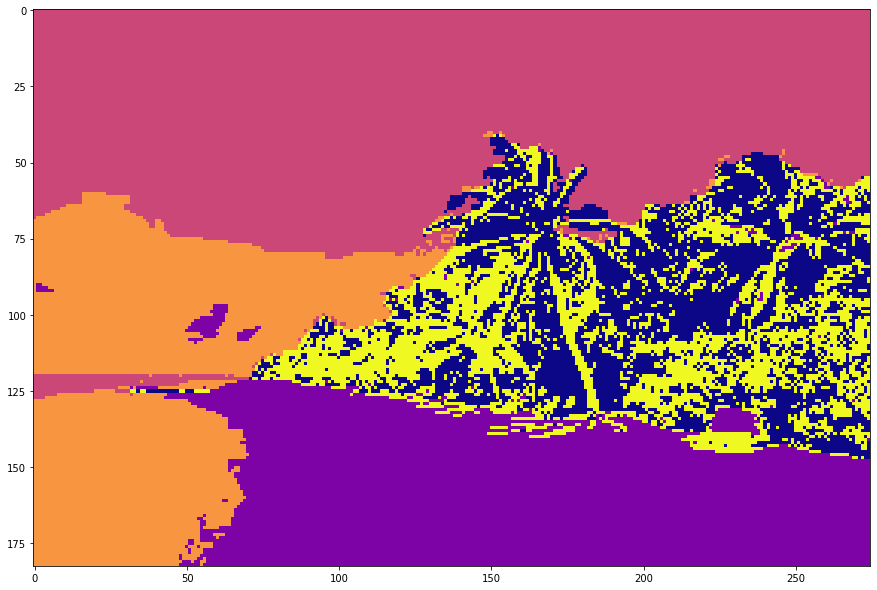

In [61]:
plt.figure(figsize=(15,15))
plt.imshow(km3.labels_.reshape(imshape[0], imshape[1]),cmap='plasma')
plt.savefig('./outimg/km3.png')
#plt.colorbar()
plt.figure(figsize=(15,15))
plt.imshow(km4.labels_.reshape(imshape[0], imshape[1]),cmap='plasma')
plt.savefig('./outimg/km4.png')
#plt.colorbar()
plt.figure(figsize=(15,15))
plt.imshow(km5.labels_.reshape(imshape[0], imshape[1]),cmap='plasma')
plt.savefig('./outimg/km5.png')
#plt.colorbar()

In [10]:
from sklearn.mixture import GaussianMixture

In [11]:
gmm3 = GaussianMixture(n_components=3).fit(img)
gmm4 = GaussianMixture(n_components=4).fit(img)
gmm5 = GaussianMixture(n_components=5).fit(img)

In [12]:
gmm_p3 = gmm3.predict(img)
gmm_p4 = gmm4.predict(img)
gmm_p5 = gmm5.predict(img)

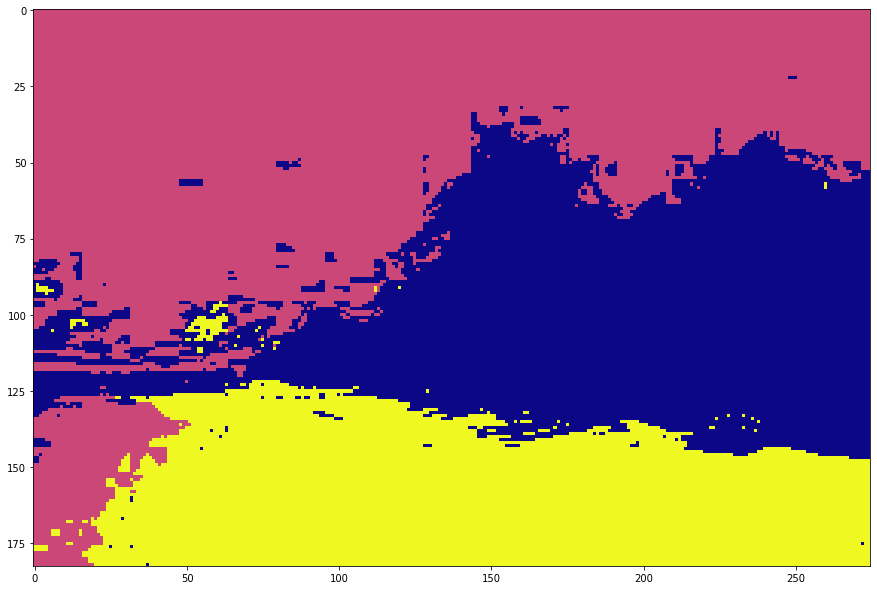

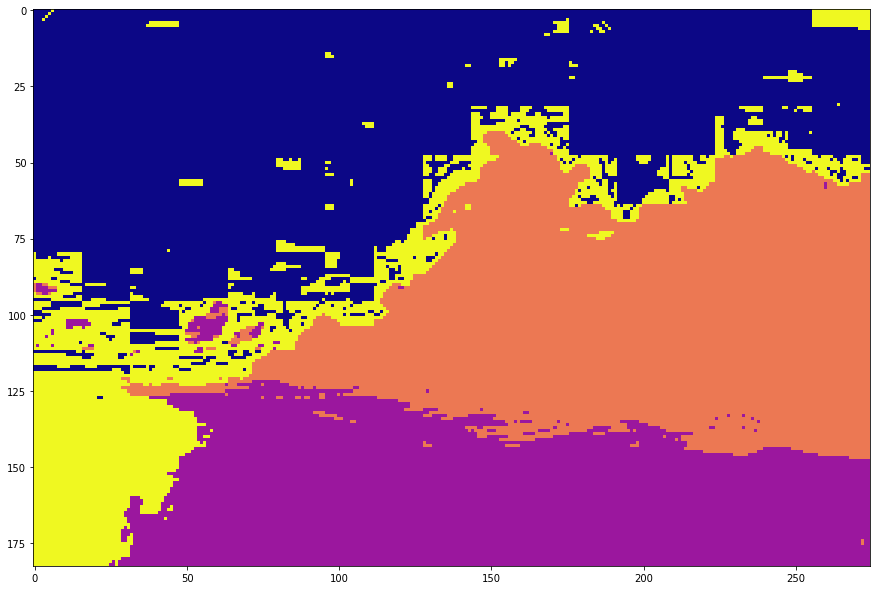

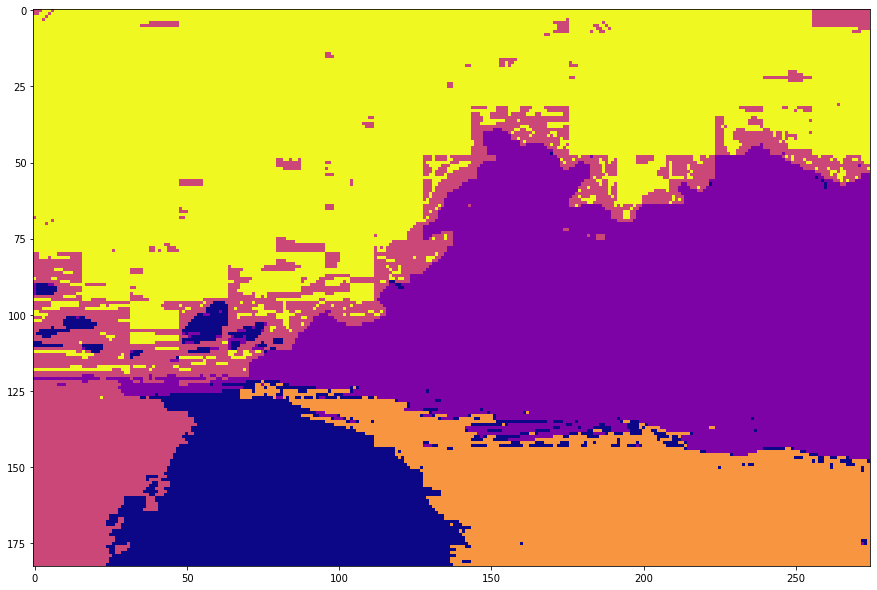

In [102]:
plt.figure(figsize=(15,15))
plt.imshow(gmm_p3.reshape(imshape[0], imshape[1]),cmap='plasma')
plt.savefig('./outimg/gmm3.png')
#plt.colorbar()
plt.figure(figsize=(15,15))
plt.imshow(gmm_p4.reshape(imshape[0], imshape[1]),cmap='plasma')
plt.savefig('./outimg/gmm4.png')
#plt.colorbar()
plt.figure(figsize=(15,15))
plt.imshow(gmm_p5.reshape(imshape[0], imshape[1]),cmap='plasma')
plt.savefig('./outimg/gmm5.png')
#plt.colorbar()

In [15]:
gt = scipy.io.loadmat('./beachgt.mat')

In [18]:
gt = gt['gt']

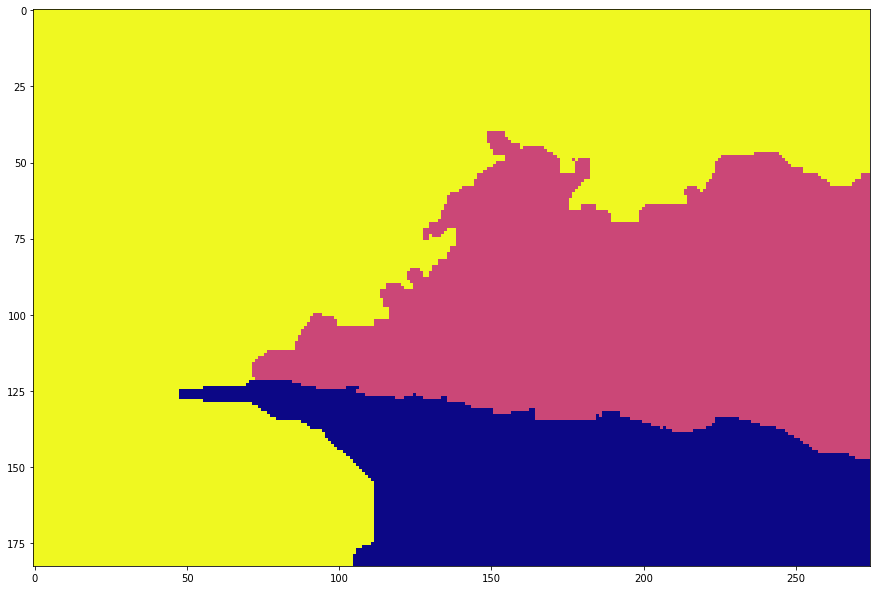

In [60]:
plt.figure(figsize=(15,15))
plt.imshow(gt,cmap='plasma')
plt.savefig('beach_gt.png')

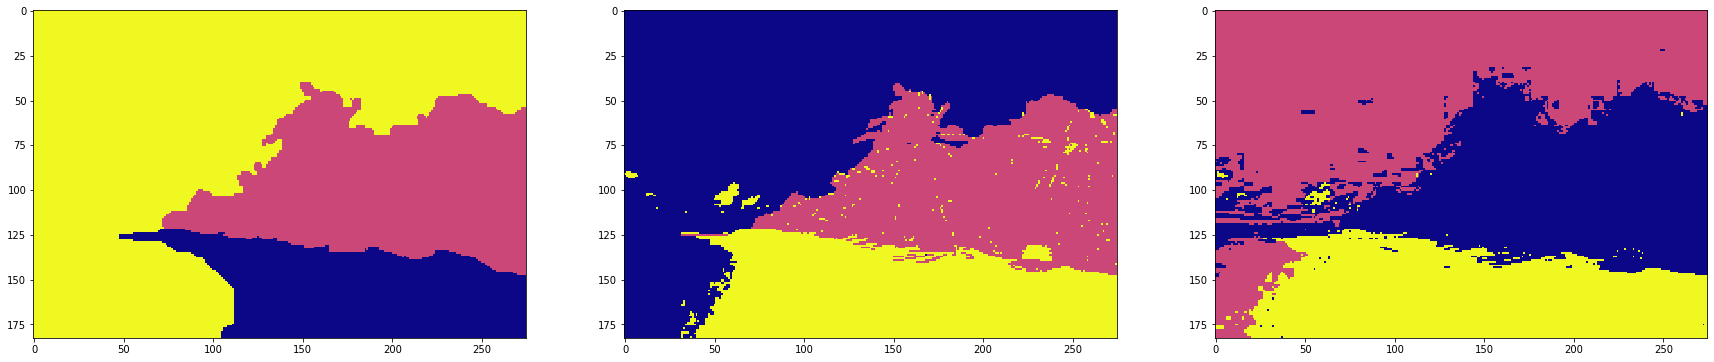

In [44]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3,figsize=(30,30))
ax1.imshow(gt,cmap='plasma')
ax2.imshow(km3.labels_.reshape(imshape[0], imshape[1]),cmap='plasma')
ax3.imshow(gmm_p3.reshape(imshape[0], imshape[1]),cmap='plasma')

In [46]:
km3_2 = np.zeros_like(km3.labels_)
for i in range(len(km3.labels_)):
    if(km3.labels_[i]==0):
        km3_2[i]=2
    elif(km3.labels_[i]==1):
        km3_2[i]=1
    elif(km3.labels_[i]==2):
        km3_2[i]=0

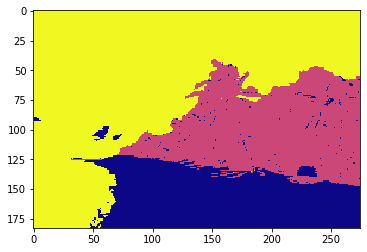

In [64]:
plt.imshow(km3_2.reshape(imshape[0], imshape[1]),cmap='plasma')

In [72]:
km4_2 = np.zeros_like(km4.labels_)
for i in range(len(km4.labels_)):
    if(km4.labels_[i]==0):
        km4_2[i]=1
    elif(km4.labels_[i]==1):
        km4_2[i]=2
    elif(km4.labels_[i]==2):
        km4_2[i]=0
    elif(km4.labels_[i]==3):
        km4_2[i]=2

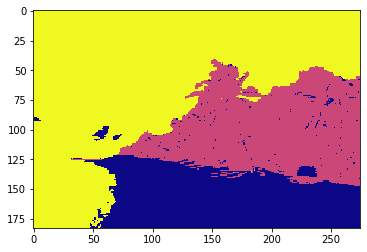

In [73]:
plt.imshow(km4_2.reshape(imshape[0], imshape[1]),cmap='plasma')

In [74]:
km5_2 = np.zeros_like(km5.labels_)
for i in range(len(km5.labels_)):
    if(km5.labels_[i]==0):
        km5_2[i]=1
    elif(km5.labels_[i]==1):
        km5_2[i]=0
    elif(km5.labels_[i]==2):
        km5_2[i]=2
    elif(km5.labels_[i]==3):
        km5_2[i]=2
    elif(km5.labels_[i]==4):
        km5_2[i]=1

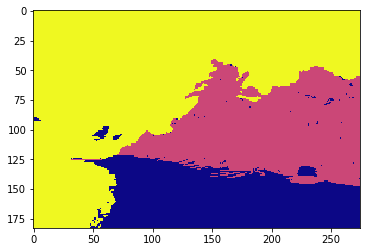

In [75]:
plt.imshow(km5_2.reshape(imshape[0], imshape[1]),cmap='plasma')

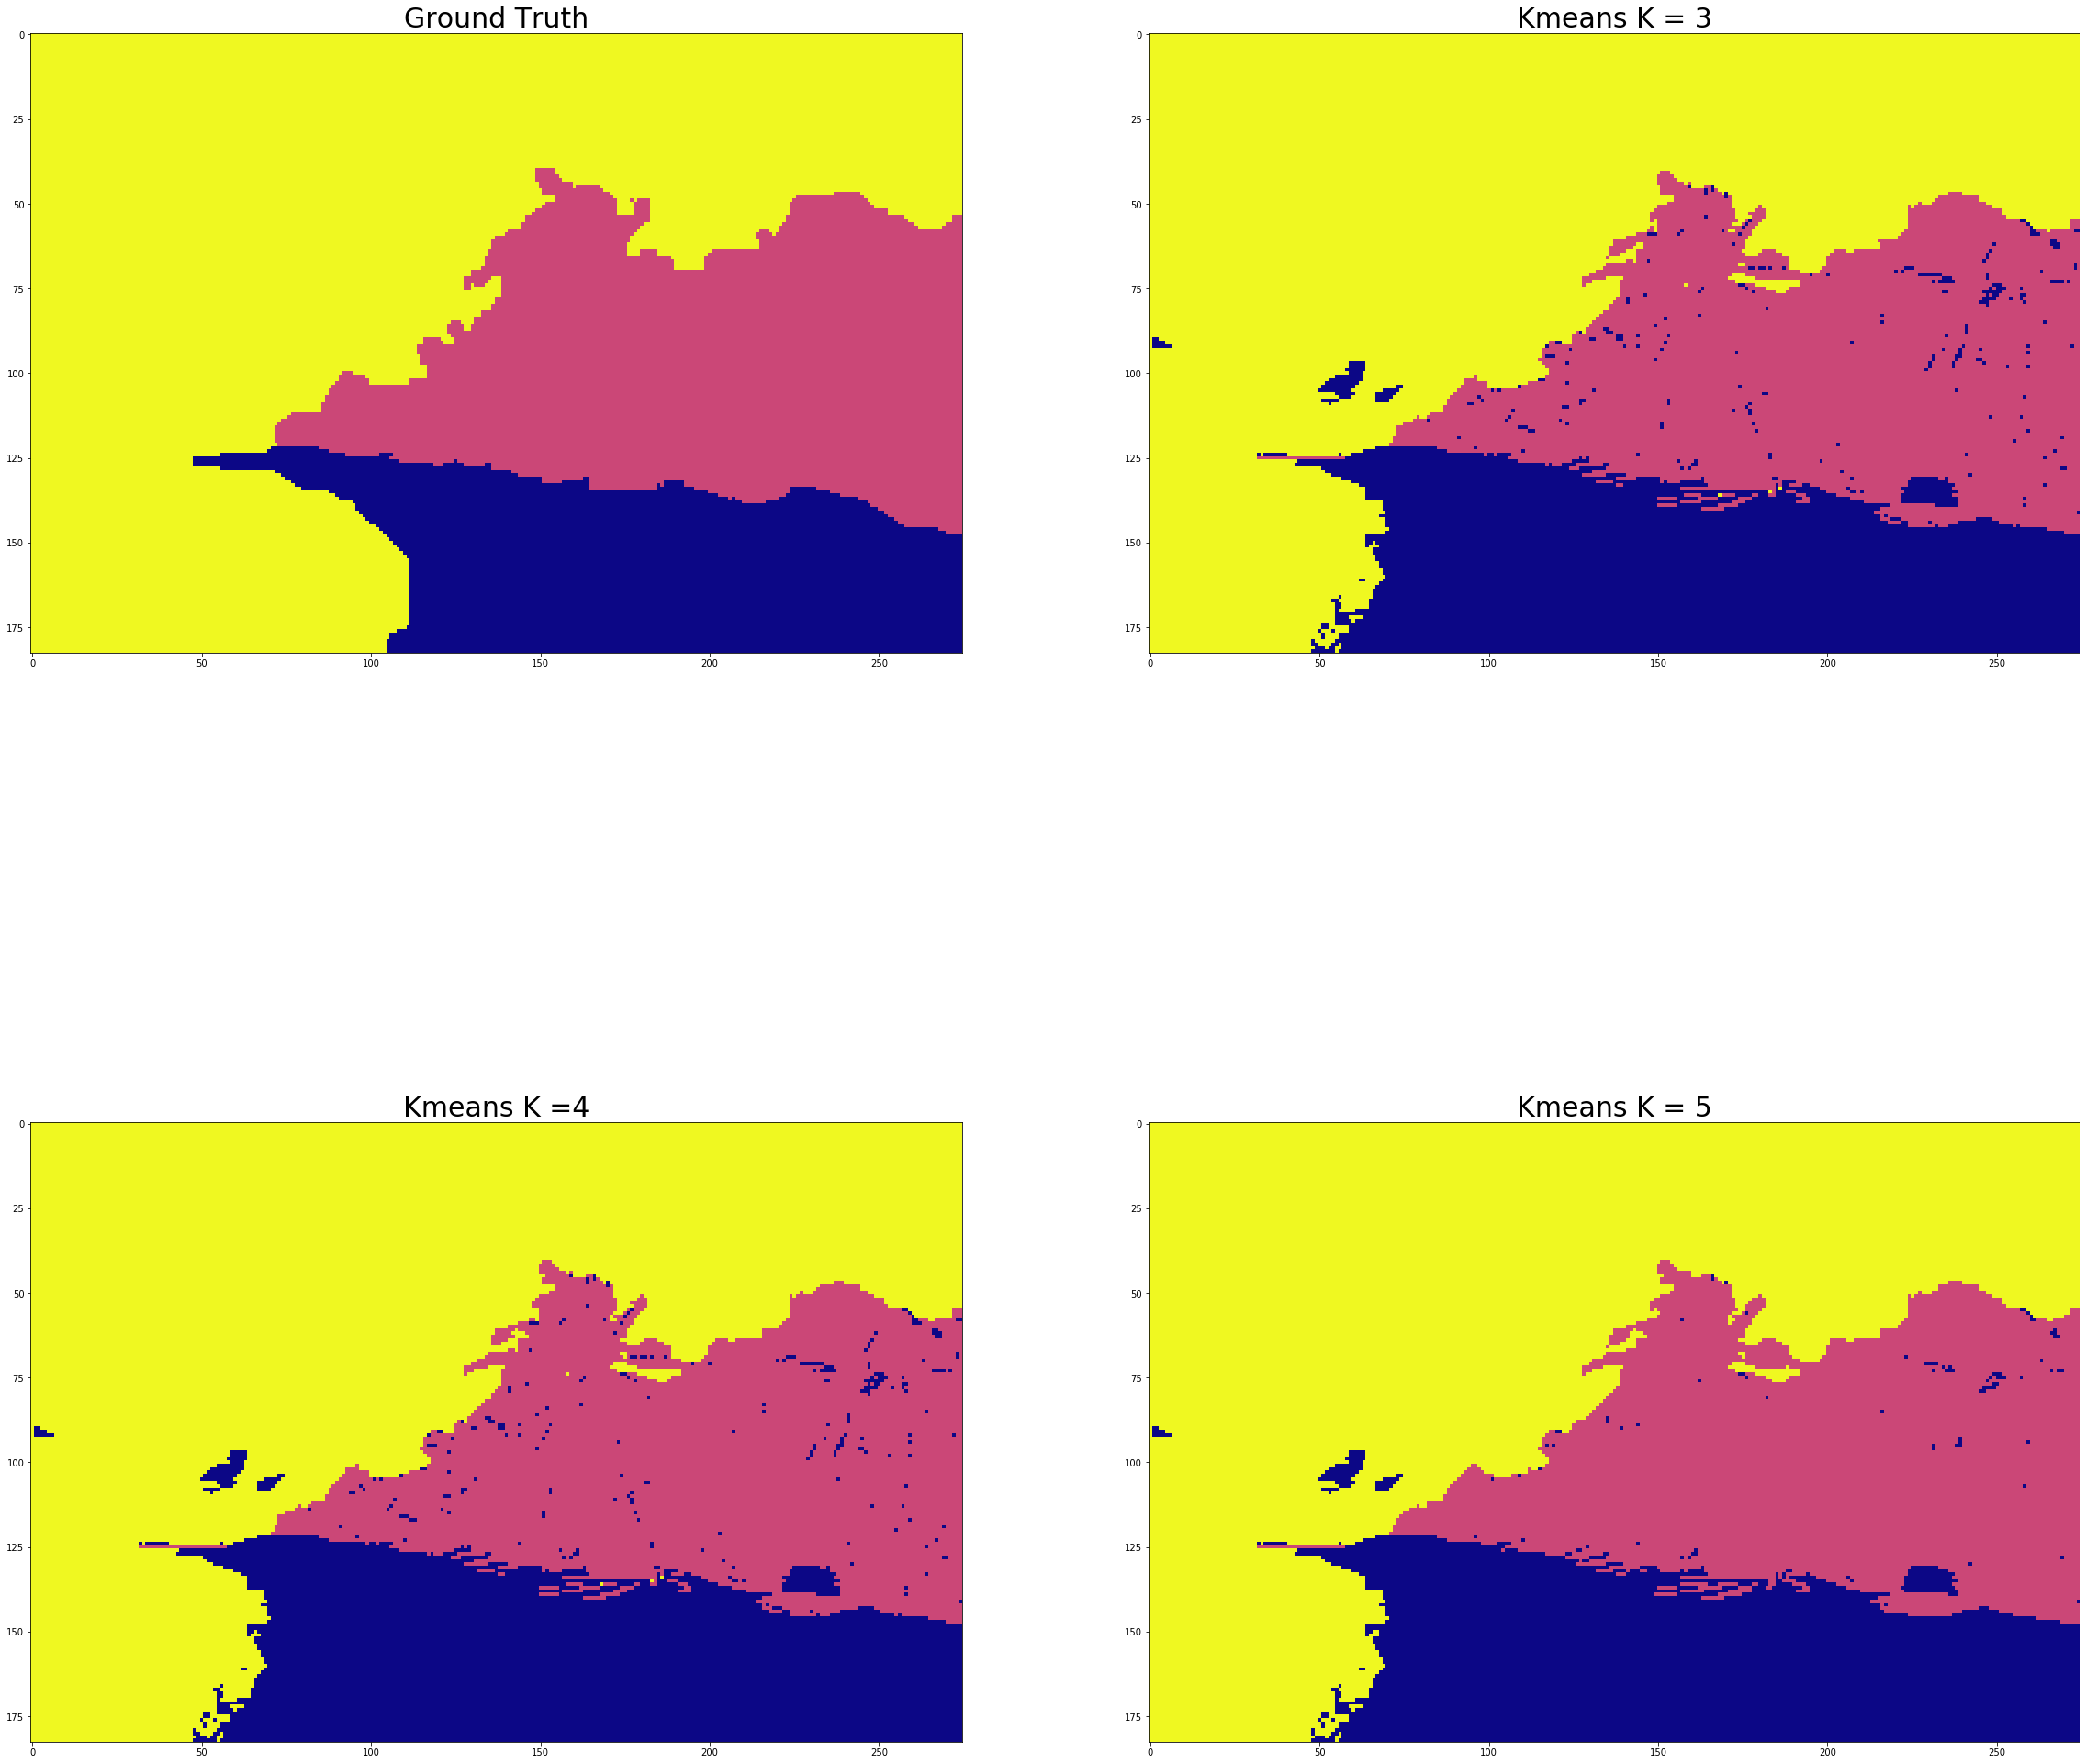

In [91]:
fig, axs = plt.subplots(2,2,figsize=(40,40))
axs[0,0].imshow(gt,cmap='plasma')
axs[0,0].set_title('Ground Truth',fontsize= 30)
axs[0,1].imshow(km3_2.reshape(imshape[0], imshape[1]),cmap='plasma')
axs[0,1].set_title('Kmeans K = 3',fontsize= 30)
axs[1,0].imshow(km4_2.reshape(imshape[0], imshape[1]),cmap='plasma')
axs[1,0].set_title('Kmeans K =4',fontsize= 30)
axs[1,1].imshow(km5_2.reshape(imshape[0], imshape[1]),cmap='plasma')
axs[1,1].set_title('Kmeans K = 5',fontsize= 30)

plt.savefig('.\outimg\kmall.png')

In [89]:
from sklearn.metrics import classification_report,confusion_matrix

In [93]:
print(confusion_matrix(gt.reshape(-1,1),km3_2))
print(confusion_matrix(gt.reshape(-1,1),km4_2))
print(confusion_matrix(gt.reshape(-1,1),km5_2))

[[ 8220   360     6]
 [  333 12222   395]
 [ 2303    24 26462]]
[[ 8220   360     6]
 [  333 12208   409]
 [ 2303    23 26463]]
[[ 8151   431     4]
 [  140 12416   394]
 [ 2301    25 26463]]


In [88]:
print(classification_report(gt.reshape(-1,1),km3_2))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85      8586
           1       0.97      0.94      0.96     12950
           2       0.99      0.92      0.95     28789

    accuracy                           0.93     50325
   macro avg       0.90      0.94      0.92     50325
weighted avg       0.94      0.93      0.93     50325



In [49]:
gmm3_2 = np.zeros_like(gmm_p3)
for i in range(len(gmm_p3)):
    if(gmm_p3[i]==0):
        gmm3_2[i]=1
    elif(gmm_p3[i]==1):
        gmm3_2[i]=2
    elif(gmm_p3[i]==2):
        gmm3_2[i]=0

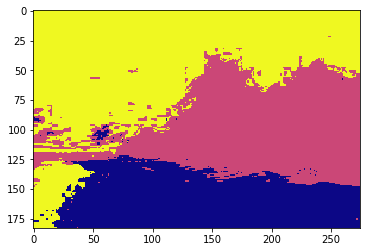

In [50]:
plt.imshow(gmm3_2.reshape(imshape[0], imshape[1]),cmap='plasma')

In [94]:
gmm4_2 = np.zeros_like(gmm_p4)
for i in range(len(gmm_p4)):
    if(gmm_p4[i]==0):
        gmm4_2[i]=2
    elif(gmm_p4[i]==1):
        gmm4_2[i]=0
    elif(gmm_p4[i]==2):
        gmm4_2[i]=1
    elif(gmm_p4[i]==3):
        gmm4_2[i]=2

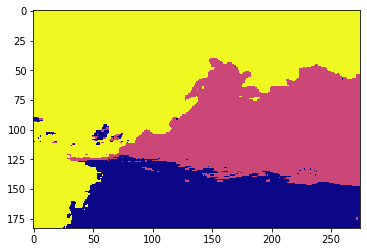

In [95]:
plt.imshow(gmm4_2.reshape(imshape[0], imshape[1]),cmap='plasma')

In [98]:
gmm5_2 = np.zeros_like(gmm_p5)
for i in range(len(gmm_p5)):
    if(gmm_p5[i]==0):
        gmm5_2[i]=2
    elif(gmm_p5[i]==1):
        gmm5_2[i]=1
    elif(gmm_p5[i]==2):
        gmm5_2[i]=2
    elif(gmm_p5[i]==3):
        gmm5_2[i]=0
    elif(gmm_p5[i]==4):
        gmm5_2[i]=2

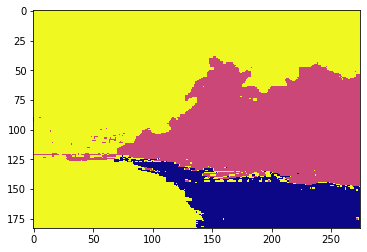

In [99]:
plt.imshow(gmm5_2.reshape(imshape[0], imshape[1]),cmap='plasma')

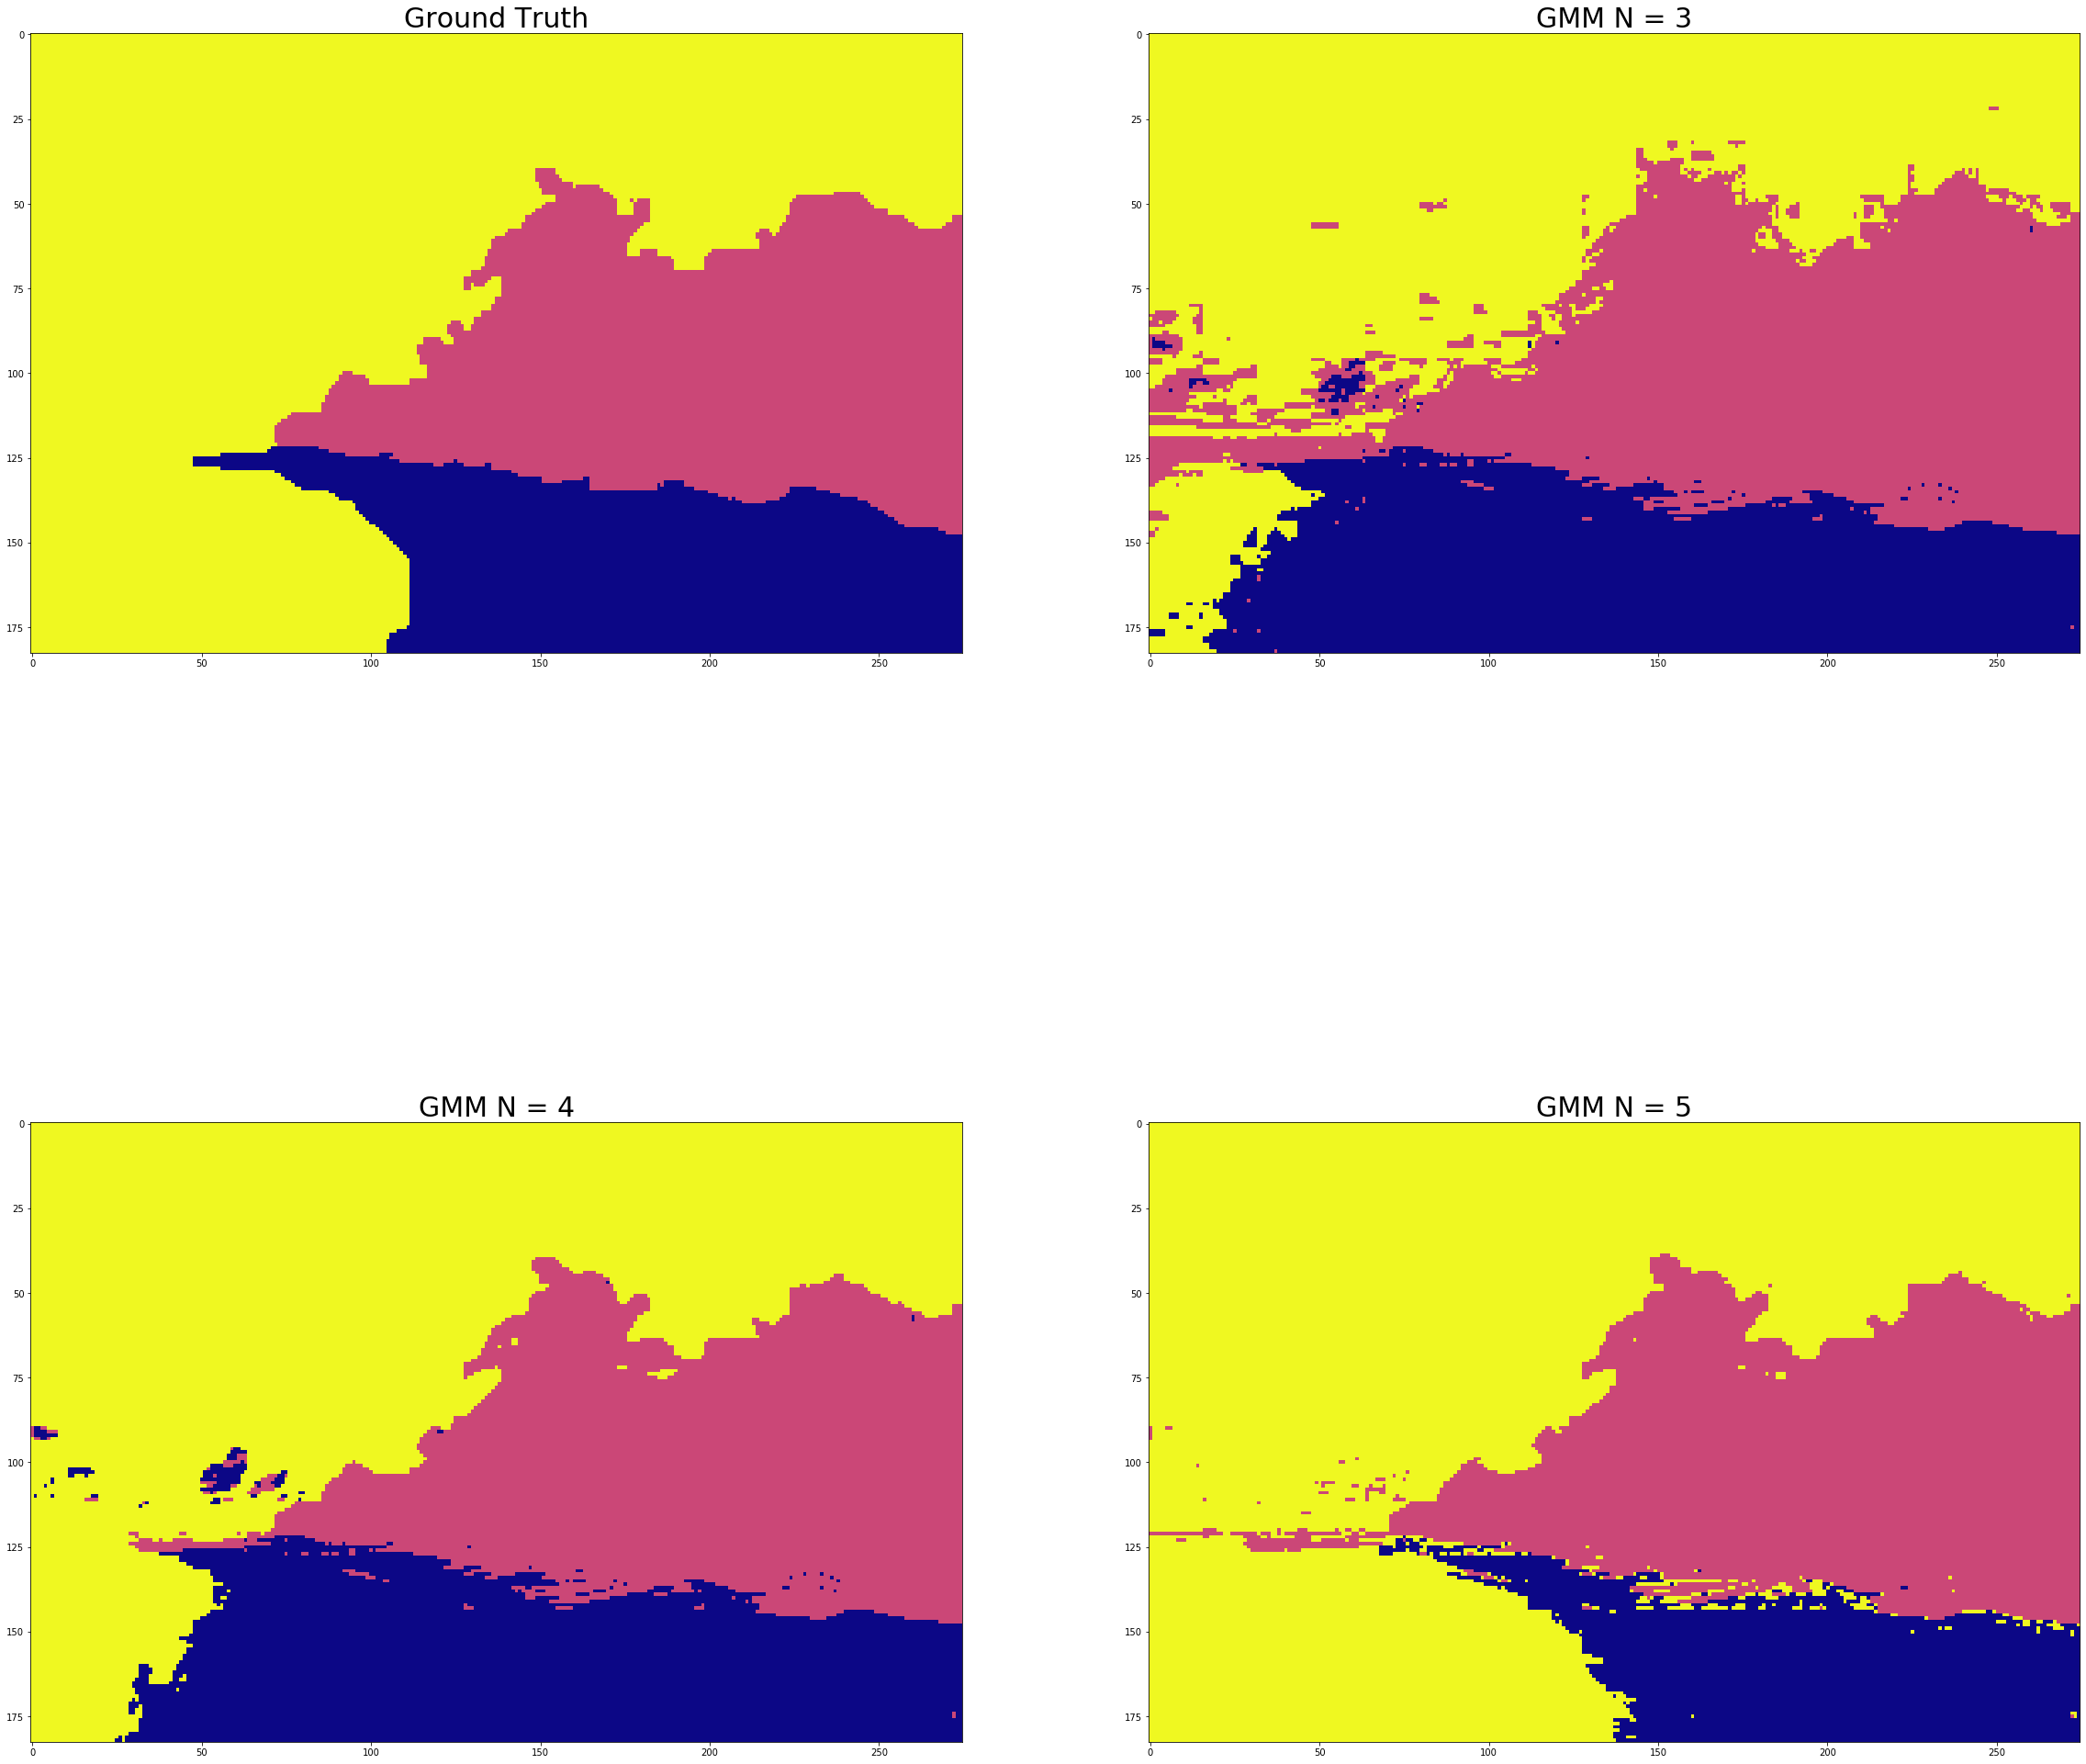

In [103]:
fig, axs = plt.subplots(2,2,figsize=(40,40))
axs[0,0].imshow(gt,cmap='plasma')
axs[0,0].set_title('Ground Truth',fontsize= 30)
axs[0,1].imshow(gmm3_2.reshape(imshape[0], imshape[1]),cmap='plasma')
axs[0,1].set_title('GMM N = 3',fontsize= 30)
axs[1,0].imshow(gmm4_2.reshape(imshape[0], imshape[1]),cmap='plasma')
axs[1,0].set_title('GMM N = 4',fontsize= 30)
axs[1,1].imshow(gmm5_2.reshape(imshape[0], imshape[1]),cmap='plasma')
axs[1,1].set_title('GMM N = 5',fontsize= 30)

plt.savefig('.\outimg\GMMall.png')

In [104]:
print(confusion_matrix(gt.reshape(-1,1),gmm3_2))
print(confusion_matrix(gt.reshape(-1,1),gmm4_2))
print(confusion_matrix(gt.reshape(-1,1),gmm5_2))

[[ 7755   831     0]
 [    8 12937     5]
 [ 4054  2844 21891]]
[[ 7741   845     0]
 [   10 12844    96]
 [ 3444   293 25052]]
[[ 6258   776  1552]
 [    0 12888    62]
 [    0   453 28336]]


In [56]:
plt.savefig(fig)

ValueError: fname must be a PathLike or file handle

<Figure size 432x288 with 0 Axes>

In [105]:
confusion_matrix

<function sklearn.metrics.classification.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)>